In [1]:
import xarray as xr

In [2]:
from cartopy import crs, feature
import display
import matplotlib.pyplot as plt

In [3]:
dataset = "s3://hedp/era5/ecv-for-climate-change-1979-2023.zarr"

In [4]:
PROJECTION = crs.Miller()
area = {"latitude": slice(55, 45), "longitude": slice(2, 24)}
sel_season = "12"

In [5]:
ds = xr.open_dataset(dataset, chunks={}, engine="zarr").astype("float32")
ds

<xarray.Dataset>
Dimensions:              (time: 537, latitude: 721, longitude: 1440)
Coordinates:
    depthBelowLandLayer  float64 ...
  * latitude             (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    number               int64 ...
    step                 timedelta64[ns] ...
    surface              float64 ...
  * time                 (time) datetime64[ns] 1978-12-31T18:00:00 ... 2023-0...
    valid_time           (time) datetime64[ns] dask.array<chunksize=(537,), meta=np.ndarray>
Data variables:
    swvl1                (time, latitude, longitude) float32 dask.array<chunksize=(48, 256, 256), meta=np.ndarray>
    t2m                  (time, latitude, longitude) float32 dask.array<chunksize=(48, 256, 256), meta=np.ndarray>
    tp                   (time, latitude, longitude) float32 dask.array<chunksize=(48, 256, 256), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2023-10-15T14:36 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [6]:
%%time

ds_central_europe = ds.sel(**area)
t2m_central_europe_last_winter = ds_central_europe.t2m.resample(time="QS-DEC").mean(dim="time").sel(time=f"2022-{sel_season}").compute()

CPU times: user 5.93 s, sys: 124 ms, total: 6.05 s
Wall time: 6.37 s


/opt/conda/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


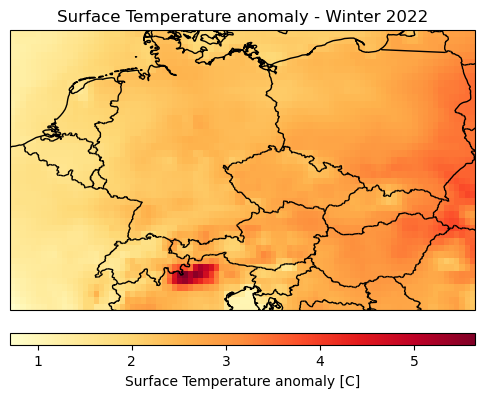

In [7]:
# display.map(t2m_central_europe_last_winter, vmax=None, cmap="YlOrRd", title="Surface Temperature anomaly - Winter 2022")
_, ax = plt.subplots(
    figsize=(6, 6),
    subplot_kw={"projection": PROJECTION},
)
t2m_central_europe_last_winter.plot(
    ax=ax, 
    cmap="YlOrRd", 
    transform=crs.PlateCarree(), 
    cbar_kwargs={"orientation": "horizontal", "pad": 0.05, "aspect": 40, "label": "Surface Temperature anomaly [C]"},
)
ax.coastlines()
ax.add_feature(feature.BORDERS)
ax.set_title("Surface Temperature anomaly - Winter 2022")
plt.show()

In [10]:
%%time

ds_central_europe = ds.sel(**area)
t2m_central_europe_seasons = ds_central_europe.t2m.resample(time="QS-DEC").mean(dim=["time", "latitude", "longitude"])
t2m_central_europe_winter = t2m_central_europe_seasons.sel(time=t2m_central_europe_seasons["time.month"] == int(sel_season))

CPU times: user 262 ms, sys: 76.3 ms, total: 338 ms
Wall time: 801 ms


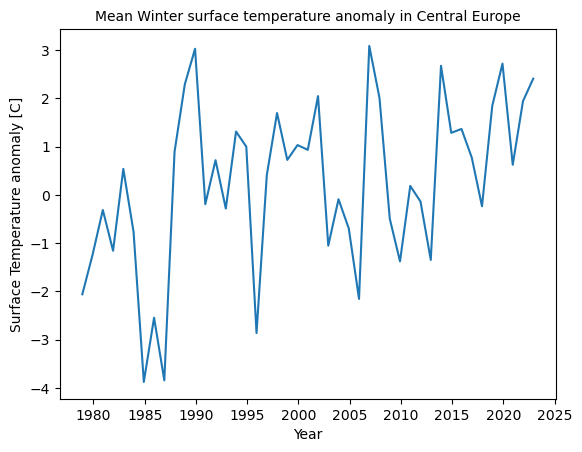

In [11]:
plt.plot(t2m_central_europe_winter["time"], t2m_central_europe_winter)
plt.xlabel("Year")
plt.ylabel("Surface Temperature anomaly [C]")
plt.title("Mean Winter surface temperature anomaly in Central Europe", size=10)
plt.show()